## Классификация клиентов банка - прогнозирование оттока

### Подключение модулей

In [158]:
# импортируем модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score

In [159]:
# Импортируем классификаторы
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [160]:
# вывод графиков здесь
%matplotlib inline

### Загрузка данных

In [161]:
# Загружаем данные, разделяя их
df = pd.read_csv('Churn_Modelling.csv', sep=';')

In [163]:
# Выводим первые несколько строк
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


### Описание данных

Признаки:
- RowNumber – индекс строки в данных
- CustomerId – уникальный идентификатор клиента
- Surname – фамилия
- CreditScore – кредитный рейтинг
- Geography – страна проживания
- Gender – пол
- Age – возраст
- Tenure – количество недвижимости у клиента
- Balance – баланс на счёте
- NumOfProducts -количество продуктов банка, используемых клиентом
- HasCrCard – наличие кредитной карты
- IsActiveMember – активность клиента
- EstimatedSalary – предполагаемая зарплата

Целевой (искомый) признак:
- Exited – факт ухода клиента

### Преобразование небинарных категориальных признаков в набор фиктивных бинарных

In [164]:
# генерация бинарных колонок (фиктивных переменных) для категориального признака Geography
geography_cols = pd.get_dummies(df["Geography"], dtype=int)
geography_cols.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


### Преобразование бинарных категориальных признаков

In [165]:
df['Gender']= df['Gender'].map({'Male':0, 'Female':1})

### Формирование дата-сета для обучения моделей

In [166]:
# список имён признаков, которые будут использоваться для построения модели
features_names = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                  'IsActiveMember', 'EstimatedSalary']

In [167]:
# объединение изначальных признаков и фиктивных бинарных признаков - формирование матрицы Объекты-признаки
X = pd.concat([df[features_names], geography_cols], axis = 1)
X.shape

(10000, 12)

In [168]:
# выделение целевой переменной (таргета) в отдельный вектор
y = df['Exited']

### Моделируем

In [169]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [170]:
# Выводим выборки
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6700, 12) (3300, 12) (6700,) (3300,)


# Обучение моделей

### KNeighborsClassifier (Классификация ближайших соседей)

In [171]:
# метод k-ближайших соседей
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [172]:
# Сохраняем предсказание
knn_test_predict = knn.predict(X_test)

In [173]:
# Высчитываем долю правильно классифицированных объектов среди всех объектов
knn_accuracy = accuracy_score(y_test, knn_test_predict, normalize=True)
knn_accuracy

0.769090909090909

### Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [174]:
# метод Гаусса
gnb = GaussianNB()
gnb.fit(X, y)

GaussianNB()

In [175]:
# Сохраняем предсказание
gnb_pred_test = gnb.predict(X_test)

In [176]:
# Высчитываем долю правильно классифицированных объектов среди всех объектов
gnb_accuracy = accuracy_score(y_test, gnb_pred_test)
gnb_accuracy

0.793939393939394

### Random Forest Classifier (Классификатор дерева решений)

In [177]:
# Классификатор дерева решений
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_jobs=-1, random_state=42)

In [178]:
# Сохраняем предсказание
rfc_pred_test = rfc.predict(X_test)

In [179]:
# Высчитываем долю правильно классифицированных объектов среди всех объектов
rfc_accuracy = accuracy_score(y_test, rfc_pred_test)
rfc_accuracy

0.8712121212121212

### Logistic Regression (Логистическая регрессия)

In [180]:
# Метод логистической регрессии
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [181]:
# Сохраняем предсказание
lr_pred_test = lr.predict(X_test)

In [182]:
# Высчитываем долю правильно классифицированных объектов среди всех объектов
lr_accuracy = accuracy_score(y_test, lr_pred_test)
lr_accuracy

0.8115151515151515

## Метрики классификации

In [183]:
# Импортируем метрики
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import classification_report

In [184]:
# Делаем матрицу ошибок
cm = confusion_matrix(y_test, y_test_predict)

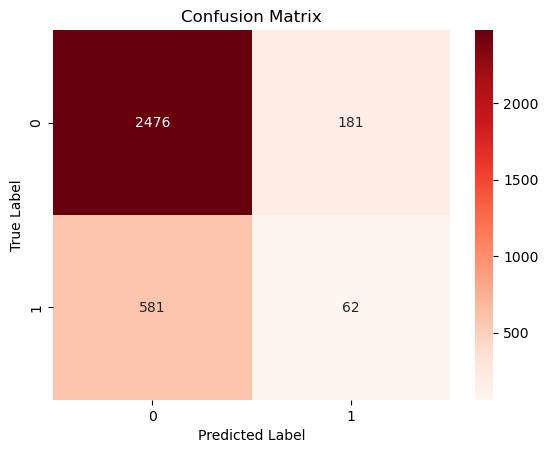

In [185]:
# Выводим матрицу
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

C:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


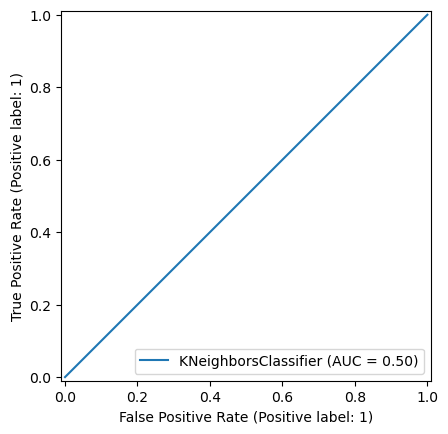

In [156]:
# Выводим кривую для теста
svc_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)

C:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


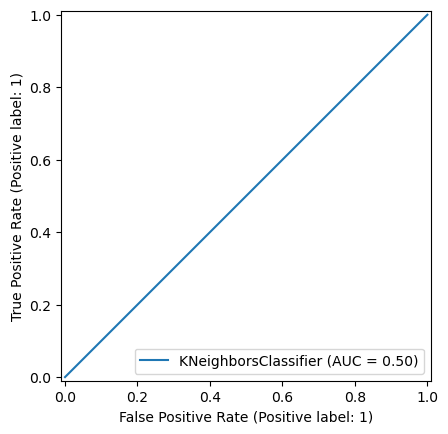

In [157]:
# Выводим кривую для тренировки
svc_disp = RocCurveDisplay.from_estimator(knn, X_train, y_train)

C:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


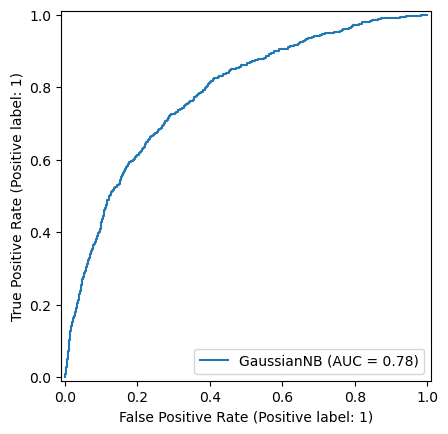

In [186]:
# Выводим кривую для теста
svc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

C:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


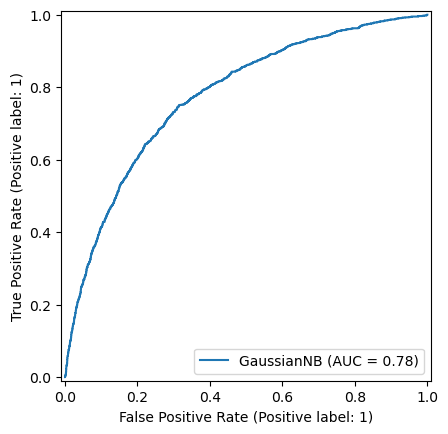

In [187]:
# Выводим кривую для тренировки
svc_disp = RocCurveDisplay.from_estimator(gnb, X_train, y_train)

C:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


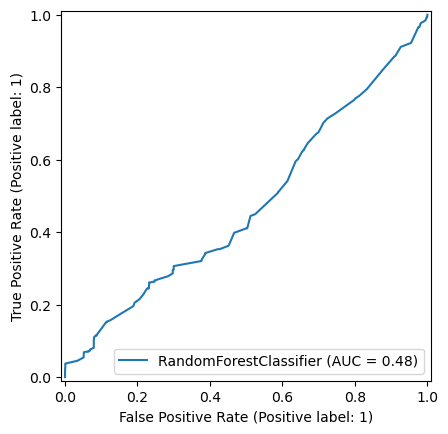

In [188]:
# Выводим кривую для теста
svc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test)

C:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


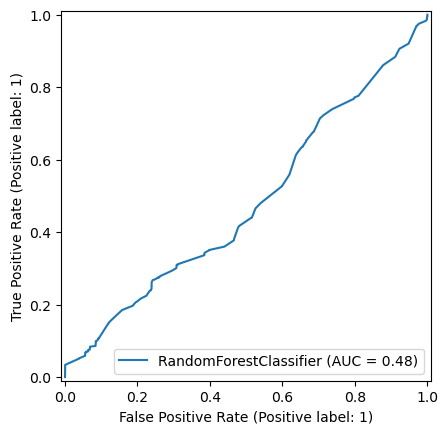

In [189]:
# Выводим кривую для тренировки
svc_disp = RocCurveDisplay.from_estimator(rfc, X_train, y_train)

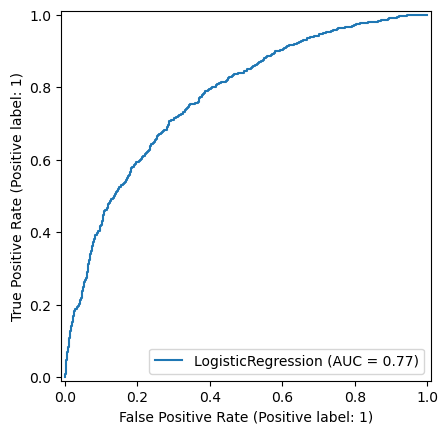

In [190]:
# Выводим кривую для теста
svc_disp = RocCurveDisplay.from_estimator(lr, X_test, y_test)

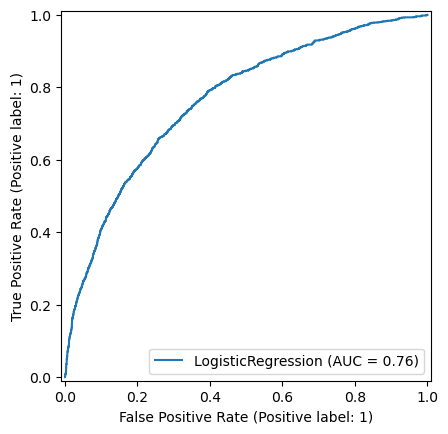

In [191]:
# Выводим кривую для тренировки
svc_disp = RocCurveDisplay.from_estimator(lr, X_train, y_train)

## Сравнительный анализ

In [195]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy, lr_accuracy]
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.769091
1,Gaussian Naive Bayes,0.793939
2,Random Forest Classifier,0.871212
3,Logistic Regression,0.811515


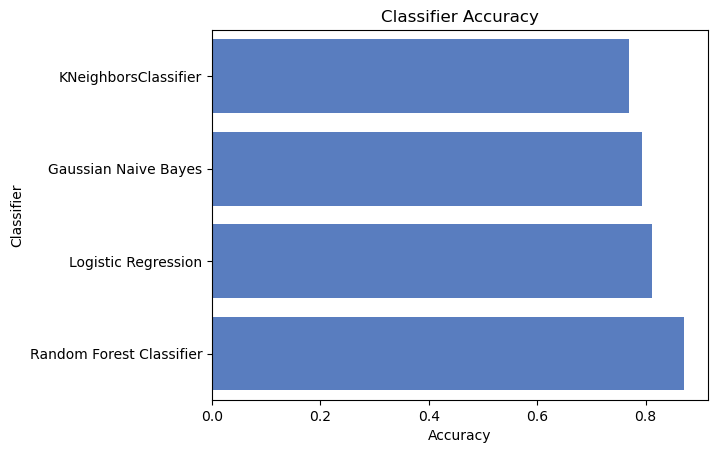

In [196]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");

Самая лучшая модель - RFC